# Processing of Cookie Dataset
by **Banaag, Karl Aldous**, **Estoque, Kirk Nathaniel**, and **Rivera, Alfondso Richard**.

## Downloading Data
The researchers needed to process the cookie dataset before extracting insights from it.

### Getting Text of Dataset
The researchers used the `open` function in Python to extract the data.

In [1]:
data_file = open("DS163 PROJECT DATASET.txt", mode="r", encoding = "ISO-8859-1")
data_text = data_file.read() # get file in a string
data_file.close()

In [2]:
data_text

' \n\n\n1  \n all purpose flour  \n 3.0 cups all purpose flour  \n AR_1  \n 0.920724583  \n 3  \n cup\n2  \n all purpose flour  \n 2.8000000000000003 cups all purpose flour  \n AR_10  \n 0.905162048  \n 2.8  \n cup\n3  \n all purpose flour  \n 1.1076923076923078 cups all purpose flour  \n AR_101  \n 0.6  \n 1.107692308  \n cup\n4  \n all purpose flour  \n 3.333333333333333 cups sifted all purpose flour  \n AR_102  \n 0.9375  \n 3.333333333  \n cup\n5  \n all purpose flour  \n 2.0 cups all purpose flour  \n AR_103  \n 0.88125  \n 2  \n cup\n6  \n all purpose flour  \n 9.0 cups unbleached all purpose flour  \n AR_107  \n 0.927272701  \n 9  \n cup\n7  \n all purpose flour  \n 0.8571428571428571 cups all purpose flour  \n AR_108  \n 0.867741966  \n 0.857142857  \n cup\n8  \n all purpose flour  \n 2.6666666666666665 cups all purpose flour  \n AR_109  \n 0.871794891  \n 2.666666667  \n cup\n9  \n all purpose flour  \n 3.333333333333333 cups all purpose flour  \n AR_11  \n 0.902891922  \n 3.3

### Cleaning Lines of Data

Some of the lines contain `\n` and not an actual new line. So, the researchers replaced `\\n` with `\n`

In [3]:
import re

data_text = re.sub(r"\\n", '\n', data_text)
data_text

' \n\n\n1  \n all purpose flour  \n 3.0 cups all purpose flour  \n AR_1  \n 0.920724583  \n 3  \n cup\n2  \n all purpose flour  \n 2.8000000000000003 cups all purpose flour  \n AR_10  \n 0.905162048  \n 2.8  \n cup\n3  \n all purpose flour  \n 1.1076923076923078 cups all purpose flour  \n AR_101  \n 0.6  \n 1.107692308  \n cup\n4  \n all purpose flour  \n 3.333333333333333 cups sifted all purpose flour  \n AR_102  \n 0.9375  \n 3.333333333  \n cup\n5  \n all purpose flour  \n 2.0 cups all purpose flour  \n AR_103  \n 0.88125  \n 2  \n cup\n6  \n all purpose flour  \n 9.0 cups unbleached all purpose flour  \n AR_107  \n 0.927272701  \n 9  \n cup\n7  \n all purpose flour  \n 0.8571428571428571 cups all purpose flour  \n AR_108  \n 0.867741966  \n 0.857142857  \n cup\n8  \n all purpose flour  \n 2.6666666666666665 cups all purpose flour  \n AR_109  \n 0.871794891  \n 2.666666667  \n cup\n9  \n all purpose flour  \n 3.333333333333333 cups all purpose flour  \n AR_11  \n 0.902891922  \n 3.3

Then, the researchers split the data by `\n`.

In [4]:
data_lines = data_text.split('\n')
data_lines[5]

' 3.0 cups all purpose flour  '

Once they fixed the separation of lines, they cleaned the lines themselves.<br>

In [5]:
data_lines = [ re.sub(r"\s+?\n", '', line) for line in data_lines ] # removes whitespace in end of line if line ends with \n
data_lines = [ line for line in data_lines if not line.isspace() ] # removes whitespace
data_lines = [ line for line in data_lines if len(line) > 0 ] # removes empty lines
data_lines = [ re.sub(r"\s+", ' ', line) for line in data_lines ] # changes multiple whitepspaces to only 1 whitespace
data_lines = [ line[:-1] if line[-1] == ' ' else line for line in data_lines ] # removes last character if it is space
data_lines

['1',
 ' all purpose flour',
 ' 3.0 cups all purpose flour',
 ' AR_1',
 ' 0.920724583',
 ' 3',
 ' cup',
 '2',
 ' all purpose flour',
 ' 2.8000000000000003 cups all purpose flour',
 ' AR_10',
 ' 0.905162048',
 ' 2.8',
 ' cup',
 '3',
 ' all purpose flour',
 ' 1.1076923076923078 cups all purpose flour',
 ' AR_101',
 ' 0.6',
 ' 1.107692308',
 ' cup',
 '4',
 ' all purpose flour',
 ' 3.333333333333333 cups sifted all purpose flour',
 ' AR_102',
 ' 0.9375',
 ' 3.333333333',
 ' cup',
 '5',
 ' all purpose flour',
 ' 2.0 cups all purpose flour',
 ' AR_103',
 ' 0.88125',
 ' 2',
 ' cup',
 '6',
 ' all purpose flour',
 ' 9.0 cups unbleached all purpose flour',
 ' AR_107',
 ' 0.927272701',
 ' 9',
 ' cup',
 '7',
 ' all purpose flour',
 ' 0.8571428571428571 cups all purpose flour',
 ' AR_108',
 ' 0.867741966',
 ' 0.857142857',
 ' cup',
 '8',
 ' all purpose flour',
 ' 2.6666666666666665 cups all purpose flour',
 ' AR_109',
 ' 0.871794891',
 ' 2.666666667',
 ' cup',
 '9',
 ' all purpose flour',
 ' 3.3333

In [6]:
len(data_lines)

14079

After cleaning the lines, they realized that not all the ingredients had 7 lines. Some text occupies multiple lines.

In [7]:
list_list_ingredients = []

for i in range(len(data_lines)):
    if data_lines[i].startswith(' '):
        list_list_ingredients[-1].append(data_lines[i])
    else:
        list_list_ingredients.append([])
        list_list_ingredients[-1].append(data_lines[i])

In [8]:
# Test to see if all ingredients have 7 lines

ingredient_lengths = [ len(list_ingredients) for list_ingredients in list_list_ingredients ]

for i in range(len(ingredient_lengths)):
    if ingredient_lengths[i] != 7:
        print("Not all ingredients occupy 7 lines.")
        print(list_list_ingredients[i])
        break

Not all ingredients occupy 7 lines.
['105', ' all purpose flour', ' "18.75 ounces all purpose flour', ' such as gold medal"', ' Misc_110', ' NA', ' 2.34375', ' cup']


The researchers noticed that the initial line element of the line for the ingredient starts with a quotation mark. Then, the last line element of the line for the ingredient ends with a quotation mark.<br><br>
Thus, they kept this principle when iterating through every list of lines for ingredients.<br>

In [9]:
for i in range(len(ingredient_lengths)-1, -1, -1):
    if ingredient_lengths[i] != 7:
        num_of_lines = len(list_list_ingredients[i])
        for j in range(num_of_lines-1, 2, -1):
            if list_list_ingredients[i][j][-1] == '"' and list_list_ingredients[i][j][0] != '"':
                list_list_ingredients[i][j-1] += list_list_ingredients[i][j]
                del list_list_ingredients[i][j]

In [10]:
ingredient_lengths = [ len(list_ingredients) for list_ingredients in list_list_ingredients ]

for i in range(len(ingredient_lengths)):
    if ingredient_lengths[i] != 7:
        print("Not all ingredients occupy 7 lines.")
        print(list_list_ingredients[i])
        break

In [11]:
list_list_ingredients[104]

['105',
 ' all purpose flour',
 ' "18.75 ounces all purpose flour such as gold medal"',
 ' Misc_110',
 ' NA',
 ' 2.34375',
 ' cup']

The researchers also had to remove the quotation marks between the texts.

In [12]:
for i in range(len(list_list_ingredients)):
    if list_list_ingredients[i][2].startswith(' "'):
        line = list_list_ingredients[i][2]
        list_list_ingredients[i][2] = re.findall(r'"(.+?)"', line)[0]

In [13]:
list_list_ingredients[104]

['105',
 ' all purpose flour',
 '18.75 ounces all purpose flour such as gold medal',
 ' Misc_110',
 ' NA',
 ' 2.34375',
 ' cup']

## Putting Lines into List of Dictionaries

In [14]:
ingredient_dicts = []

import numpy as np

for ingredient in list_list_ingredients:
    try:
        ingredient_dicts.append({
            "entry_no": int(ingredient[0]),
            "ingredient": ingredient[1].strip(),
            "text": ingredient[2].strip(),
            "recipe_index": ingredient[3].strip(),
            "rating": float(ingredient[4]),
            "quantity": float(ingredient[5].strip()),
            "unit": ingredient[6].strip()
        })
    except:
        ingredient_dicts.append({
            "entry_no": int(ingredient[0]),
            "ingredient": ingredient[1].strip(),
            "text": ingredient[2].strip(),
            "recipe_index": ingredient[3].strip(),
            "rating": np.nan,
            "quantity": float(ingredient[5].strip()),
            "unit": ingredient[6].strip()
        })

In [15]:
ingredient_dicts[200:]

[{'entry_no': 201,
  'ingredient': 'baking powder',
  'text': '0.7384615384615385 teaspoons baking powder',
  'recipe_index': 'AR_101',
  'rating': 0.6,
  'quantity': 0.738461538,
  'unit': 'teaspoon'},
 {'entry_no': 202,
  'ingredient': 'baking powder',
  'text': '1.0 teaspoon baking powder',
  'recipe_index': 'AR_119',
  'rating': 0.845714283,
  'quantity': 1.0,
  'unit': 'teaspoon'},
 {'entry_no': 203,
  'ingredient': 'baking powder',
  'text': '0.6666666666666666 teaspoon baking powder',
  'recipe_index': 'AR_14',
  'rating': 0.90666666,
  'quantity': 0.666666667,
  'unit': 'teaspoon'},
 {'entry_no': 204,
  'ingredient': 'baking powder',
  'text': '1.1428571428571428 teaspoons baking powder',
  'recipe_index': 'AR_16',
  'rating': 0.85882349,
  'quantity': 1.142857143,
  'unit': 'teaspoon'},
 {'entry_no': 205,
  'ingredient': 'baking powder',
  'text': '1.3333333333333333 teaspoon baking powder',
  'recipe_index': 'AR_169',
  'rating': 0.873728848,
  'quantity': 1.333333333,
  'uni

## Creating a Pandas DataFrame for Ingredients

In [16]:
import pandas as pd

In [17]:
df_ingredients = pd.DataFrame(ingredient_dicts)
df_ingredients.head()

,entry_no,ingredient,text,recipe_index,rating,quantity,unit
0,1,all purpose flour,3.0 cups all purpose flour,AR_1,0.920725,3.000000,cup
1,2,all purpose flour,2.8000000000000003 cups all purpose flour,AR_10,0.905162,2.800000,cup
2,3,all purpose flour,1.1076923076923078 cups all purpose flour,AR_101,0.600000,1.107692,cup
3,4,all purpose flour,3.333333333333333 cups sifted all purpose flour,AR_102,0.937500,3.333333,cup
4,5,all purpose flour,2.0 cups all purpose flour,AR_103,0.881250,2.000000,cup


The researchers wanted to sort the ingredients by their rating and recipe index, so they did using the `sort_values` function.

In [18]:
df_ingredients = df_ingredients.sort_values(by = ["rating", "recipe_index"], ascending = [False, True])
df_ingredients.head()

,entry_no,ingredient,text,recipe_index,rating,quantity,unit
10,11,all purpose flour,5.0 cups all purpose flour or more as needed,AR_111,1.0,5.0,cup
260,261,baking soda,1.0 teaspoon baking soda,AR_111,1.0,1.0,teaspoon
452,642,butter,1.0 cup butter softened,AR_111,1.0,1.0,cup
646,1048,egg,4.0 eggs,AR_111,1.0,4.0,egg
1115,1530,shortening,1.0 cup shortening,AR_111,1.0,1.0,cup


In [19]:
df_ingredients["recipe_type"] = df_ingredients["recipe_index"]

first_letters = lambda x: re.findall(r"[A-Za-z]+", x)[0]
df_ingredients["recipe_type"] = df_ingredients["recipe_type"].apply(first_letters)
df_ingredients.head()

,entry_no,ingredient,text,recipe_index,rating,quantity,unit,recipe_type
10,11,all purpose flour,5.0 cups all purpose flour or more as needed,AR_111,1.0,5.0,cup,AR
260,261,baking soda,1.0 teaspoon baking soda,AR_111,1.0,1.0,teaspoon,AR
452,642,butter,1.0 cup butter softened,AR_111,1.0,1.0,cup,AR
646,1048,egg,4.0 eggs,AR_111,1.0,4.0,egg,AR
1115,1530,shortening,1.0 cup shortening,AR_111,1.0,1.0,cup,AR


## Exploratory Data Analysis

In [20]:
from matplotlib import pyplot as plt

### Ratings of Recipes

In [21]:
rating_list = df_ingredients["rating"].to_list()

In [22]:
ratings = []
ratings_per_type = {
    "AR": [],
    "E": [],
    "Misc": []
}

for recipe in df_ingredients["recipe_index"].unique():
    ratings.append(
        df_ingredients[df_ingredients["recipe_index"] == recipe]["rating"].iloc[0]
    )

    ratings_per_type[first_letters(recipe)].append(
        df_ingredients[df_ingredients["recipe_index"] == recipe]["rating"].iloc[0]
    )

C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


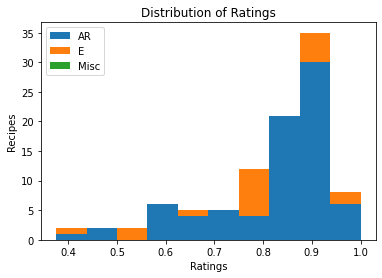

In [23]:
# plt.hist(rating_list)
plt.hist(
[
    ratings_per_type["AR"],
    ratings_per_type["E"],
    ratings_per_type["Misc"]
], stacked = True)

plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Recipes")

plt.legend(["AR", "E", "Misc"])

plt.show()

The researchers found out that making a recipe that will get good reviews is very feasible. Unfortunately, this could mean that business owners can have a hard time standing out in the cookie market as the company with the best product.

The researchers recommend reducing production of cookies with ratings less than 0.75. 

## Number of Ingredients Used to Make Cookies

In [24]:
ingredient_count = []
ingredient_count_types = {
    "AR": [],
    "E": [],
    "Misc": []
}

for recipe in df_ingredients["recipe_index"].unique():
    ingredient_count.append(
        len(df_ingredients[df_ingredients["recipe_index"] == recipe])
    )

    ingredient_count_types[first_letters(recipe)].append(
        len(df_ingredients[df_ingredients["recipe_index"] == recipe])
    )

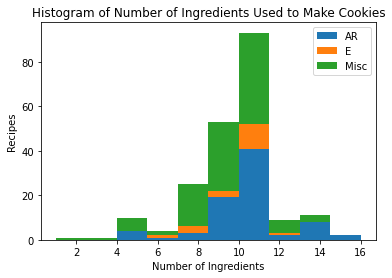

In [25]:
plt.hist([
    ingredient_count_types["AR"],
    ingredient_count_types["E"],
    ingredient_count_types["Misc"],
], stacked = True)

plt.title("Histogram of Number of Ingredients Used to Make Cookies")
plt.xlabel("Number of Ingredients")
plt.ylabel("Recipes")

plt.legend(["AR", "E", "Misc"])

plt.show()

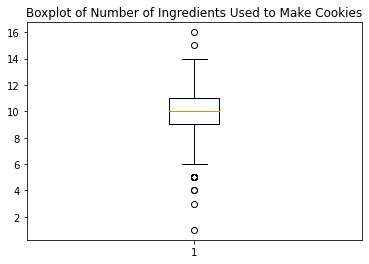

In [26]:
plt.boxplot(ingredient_count)
plt.title("Boxplot of Number of Ingredients Used to Make Cookies")
plt.show()

## Correlation between Number of Ingredients and Recipes

In [27]:
unique_recipe_indices = df_ingredients["recipe_index"].unique()

In [28]:
ingredient_count = []

for recipe in unique_recipe_indices:
    ingredient_count.append(
        len(df_ingredients[df_ingredients["recipe_index"] == recipe])
    )

In [29]:
recipe_ratings = []

for recipe in unique_recipe_indices:
    recipe_ratings.append(df_ingredients[df_ingredients["recipe_index"] == recipe]["rating"].iloc[0])

In [30]:
for i in range(len(recipe_ratings)-1, -1, -1):
    if np.isnan(recipe_ratings[i]):
        del recipe_ratings[i]
        del ingredient_count[i]

In [31]:
df_ing_rec = pd.DataFrame({
    "ingredients": ingredient_count,
    "ratings": recipe_ratings
})

df_ing_rec["ingredients"].corr(df_ing_rec["ratings"])

0.14658013544852527

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0.8, 0.6439682486666666, 0.6791666510000001, 0.7912429493333333, 0.7591914653333335, 0.8091791380000001, 0.8392416841999998, 0.8171751759090907, 0.775472021, 0.8866610050000001, 0.7090909005, 0.922985077, 0.6]


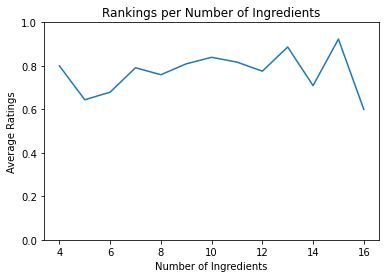

In [32]:
ratings_per_ing_count = {}

for i in range(len(recipe_ratings)):
    key = str(ingredient_count[i])
    if key not in ratings_per_ing_count:
        ratings_per_ing_count[key] = [ recipe_ratings[i] ]
    else:
        ratings_per_ing_count[key].append(recipe_ratings[i])

for key in ratings_per_ing_count:
    ratings_per_ing_count[key] = sum(ratings_per_ing_count[key]) / len(ratings_per_ing_count[key])

sorted_keys = sorted(ratings_per_ing_count.keys())
line_keys = sorted_keys[7:] + sorted_keys[:7]
line_keys

line_x = [ int(x) for x in line_keys ]
line_y = [ ratings_per_ing_count[str(x)] for x in line_keys ]

print(line_x)
print(line_y)

plt.plot(line_x, line_y)
plt.ylim(0, 1)

plt.title("Rankings per Number of Ingredients")
plt.xlabel("Number of Ingredients")
plt.ylabel("Average Ratings")

plt.show()

The researchers found that there is a weak correlation between the number of ingredients and ratings. Business owners may consider making simple cookies so that they will not unnecessarily complicate their business operations.

# Important Ingredients

The researchers wanted to know what ingredients are most important when making cookies.

<BarContainer object of 10 artists>

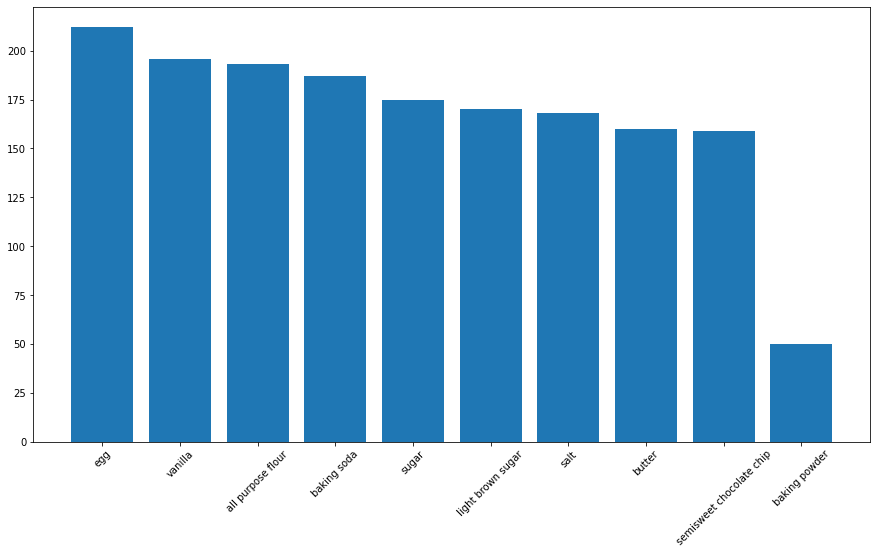

In [33]:
ing_names = df_ingredients["ingredient"].unique()
ing_counts = {}

for ingredient in df_ingredients["ingredient"]:
    if ingredient in ing_counts:
        ing_counts[ingredient] += 1
    else:
        ing_counts[ingredient] = 1

ing_values = ing_counts.values()
new_ing_counts = {}

for i in sorted(ing_values, reverse=True):
    for key in ing_counts.keys():
        if ing_counts[key] == i:
            new_ing_counts[key] = i
            break

new_ing_names = list(new_ing_counts.keys())[:10]
new_ing_counts = list(new_ing_counts.values())[:10]

plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 8)
plt.bar(new_ing_names, new_ing_counts)

In [34]:
df_ingredients[df_ingredients["recipe_type"] == "Misc"].head(20)

,entry_no,ingredient,text,recipe_index,rating,quantity,unit,recipe_type
226,227,baking powder,6.0 teaspoons baking powder,Misc_1,NaN,6.000000,teaspoon,Misc
338,339,baking soda,5.0 teaspoons baking soda,Misc_1,NaN,5.000000,teaspoon,Misc
439,440,bread flour,6.66666666667 cups bread flour,Misc_1,NaN,6.666667,cup,Misc
519,709,butter,5.0 cups unsalted butter,Misc_1,NaN,5.000000,cup,Misc
606,796,cake flour,8.0 cups minus 2 tablespoons cake flour,Misc_1,NaN,8.000000,cup,Misc
735,1137,egg,8.0 large eggs,Misc_1,NaN,8.000000,egg,Misc
1014,1429,salt,6.0 teaspoons coarse salt,Misc_1,NaN,6.000000,teaspoon,Misc
1231,1646,sugar,4.0 cup plus 2 tablespoons granulated sugar,Misc_1,NaN,4.000000,cup,Misc
1413,1828,vanilla,8.0 teaspoons natural vanilla extract,Misc_1,NaN,8.000000,teaspoon,Misc
1667,538,light brown sugar,5.0 cups light brown sugar,Misc_1,NaN,5.000000,cup,Misc


In [35]:
df_ingredients["ingredient"].unique()

array(['all purpose flour', 'baking soda', 'butter', 'egg', 'shortening',
       'sugar', 'vanilla', 'light brown sugar',
       'semisweet chocolate chip', 'baking powder', 'milk', 'salt',
       'dark chocolate chip', 'nuts', 'corn syrup', 'margarine',
       'pudding mix', 'oat', 'peanut butter', 'walnut', 'bourbon',
       'pecan', 'liquer', 'coconut extract', 'almonds',
       'white chocolate chip', 'milk chocolate chip', 'water',
       'instant coffee', 'white pepper', 'toffee', 'crispy rice', 'honey',
       'cinnamon', 'zucchini', 'brown rice flour', 'xanthan gum',
       'bittersweet chocolate chip', 'sour cream', 'coconut', 'macadmia',
       'tartar', 'vegetable oil', 'cake mix', 'cake flour', 'wheat',
       'almond extract', 'peanut butter chips', 'cream', 'raisins',
       'nestle', 'applesauce', 'graham cracker', 'maple', 'marshmallows',
       'bread flour', 'cookie mix', 'dark brown sugar',
       'chocolate raisin', 'nutmeg', 'cornstarch', 'vinegar',
       'lemon j

## Popular Cookie Flavors

<BarContainer object of 10 artists>

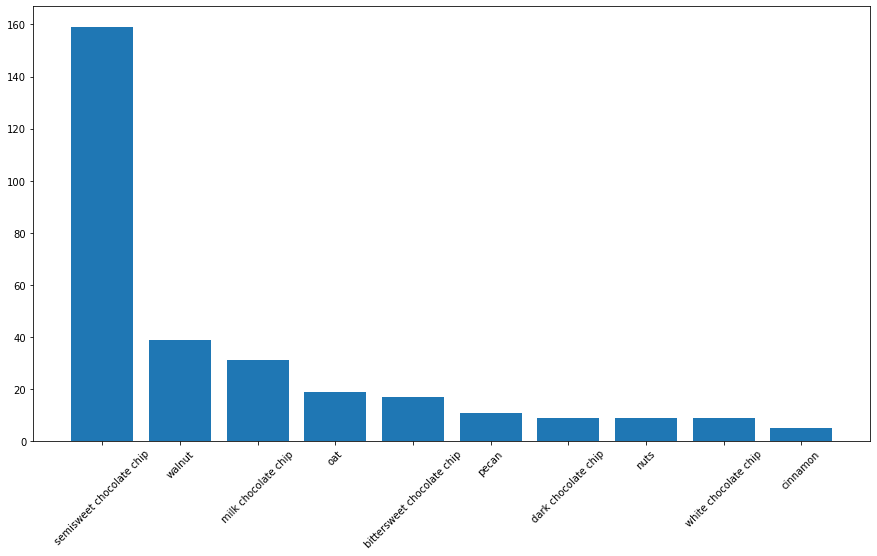

In [36]:
flavor_names = [
    'semisweet chocolate chip', 'dark chocolate chip', 'nuts', 'oat',
    'peanut butter', 'walnut', 'pecan', 'almonds',
    'white chocolate chip', 'milk chocolate chip', 'instant coffee',
    'toffee', 'crispy rice', 'cinnamon', 'bittersweet chocolate chip',
    'macadmia',  'peanut butter chips', 'chocolate raisin', 'nutmeg',
    'espresso'
]
flavor_counts = {}

for flavor in flavor_names:
    flavor_counts[flavor] = len(
        df_ingredients[df_ingredients["ingredient"] == flavor]
    )

new_flavors = {}
for i in sorted(flavor_counts.values(), reverse=True):
    for key in flavor_counts.keys():
        if flavor_counts[key] == i:
            new_flavors[key] = i

new_flavor_names = list(new_flavors.keys())[:10]
new_flavor_counts = list(new_flavors.values())[:10]

plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 8)
plt.bar(new_flavor_names, new_flavor_counts)

The most popular cookie flavor is semisweet chocolate chip.

## Effects of Alcohol on Ratings

['AR_97', 'AR_91', 'AR_128']
('Without Alcohol', 95)
('With Alcohol', 3)


<BarContainer object of 2 artists>

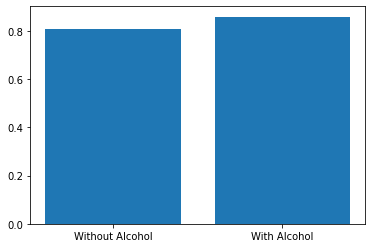

In [37]:
liquor_ingredients = df_ingredients[
    (df_ingredients["ingredient"] == 'liquer') | 
    (df_ingredients["ingredient"] == 'bourbon')
]

recipes_w_alcohol = liquor_ingredients["recipe_index"].to_list()
print(recipes_w_alcohol)

ratings_wo_alcohol = []
ratings_w_alcohol  = []

for recipe in df_ingredients["recipe_index"].unique():
    rating = df_ingredients[df_ingredients["recipe_index"] == recipe]["rating"].iloc[0]
    
    if not np.isnan(rating):
        if recipe in recipes_w_alcohol:
            ratings_w_alcohol.append(rating)
        else:
            ratings_wo_alcohol.append(rating)
            
avg_no_alcohol = sum(ratings_wo_alcohol) / len(ratings_wo_alcohol)
avg_alcohol = sum(ratings_w_alcohol) / len(ratings_w_alcohol)

print(("Without Alcohol", len(ratings_wo_alcohol)))
print(("With Alcohol", len(ratings_w_alcohol)))

bar_plot_vals = [ avg_no_alcohol, avg_alcohol ]
plt.bar(["Without Alcohol", "With Alcohol"], bar_plot_vals)

### Evaluation of Cookie Flavors

#### Chocolate Chip

In [38]:
chocolate_chip_ingredients = df_ingredients[df_ingredients["ingredient"] == 'semisweet chocolate chip']
chocolate_chip_ingredients

rcp_indices_w_choco_chip = list(chocolate_chip_ingredients["recipe_index"].unique())

rcp_w_choco_chip = df_ingredients[df_ingredients["recipe_index"].isin(rcp_indices_w_choco_chip)]
rcp_w_choco_chip.head(20)

,entry_no,ingredient,text,recipe_index,rating,quantity,unit,recipe_type
10,11,all purpose flour,5.0 cups all purpose flour or more as needed,AR_111,1.000000,5.0,cup,AR
260,261,baking soda,1.0 teaspoon baking soda,AR_111,1.000000,1.0,teaspoon,AR
452,642,butter,1.0 cup butter softened,AR_111,1.000000,1.0,cup,AR
646,1048,egg,4.0 eggs,AR_111,1.000000,4.0,egg,AR
1115,1530,shortening,1.0 cup shortening,AR_111,1.000000,1.0,cup,AR
1152,1567,sugar,1.0 cup white sugar,AR_111,1.000000,1.0,cup,AR
1331,1746,vanilla,2.0 teaspoon vanilla extract,AR_111,1.000000,2.0,teaspoon,AR
1586,457,light brown sugar,2.0 cup packed brown sugar,AR_111,1.000000,2.0,cup,AR
1794,832,semisweet chocolate chip,24 ounce package semisweet chocolate chips,AR_111,1.000000,3.0,cup,AR
92,93,all purpose flour,1.8 cups all purpose flour,E_91,1.000000,1.8,cup,E


In [39]:
rcp_w_choco_chip["recipe_index"].unique()

array(['AR_111', 'E_91', 'AR_88', 'AR_8', 'AR_67', 'AR_2', 'AR_102',
       'AR_5', 'AR_97', 'AR_155', 'AR_91', 'AR_107', 'AR_15', 'AR_156',
       'AR_4', 'AR_69', 'AR_1', 'AR_3', 'AR_164', 'AR_78', 'AR_70',
       'AR_89', 'AR_13', 'AR_14', 'AR_98', 'AR_84', 'AR_10', 'AR_11',
       'AR_90', 'AR_26', 'AR_21', 'AR_103', 'AR_19', 'AR_218', 'AR_27',
       'E_197', 'E_230', 'E_26', 'AR_169', 'AR_12', 'AR_28', 'AR_109',
       'AR_256', 'AR_23', 'AR_110', 'AR_108', 'AR_30', 'AR_16', 'AR_99',
       'AR_116', 'AR_119', 'AR_35', 'AR_118', 'AR_32', 'AR_43', 'AR_33',
       'AR_45', 'AR_113', 'AR_37', 'AR_196', 'AR_141', 'E_133', 'E_220',
       'E_375', 'E_509', 'E_79', 'E_87', 'AR_54', 'AR_128', 'AR_47',
       'AR_197', 'AR_53', 'AR_48', 'AR_142', 'AR_50', 'E_362', 'AR_101',
       'AR_39', 'AR_57', 'AR_49', 'AR_195', 'AR_140', 'AR_52', 'AR_144',
       'AR_55', 'E_88', 'AR_280', 'Misc_10', 'Misc_101', 'Misc_102',
       'Misc_103', 'Misc_104', 'Misc_105', 'Misc_107', 'Misc_108',
       '

The researchers found out that some of the top cookies are chocolate chip cookies.

In [40]:
df_ingredients[df_ingredients["rating"] == 1]["recipe_index"].unique()

array(['AR_111', 'E_399', 'E_91'], dtype=object)

#### Walnut

In [41]:
walnut_ingredients = df_ingredients[df_ingredients["ingredient"] == 'walnut']
walnut_ingredients

rcp_indices_w_walnut = list(chocolate_chip_ingredients["recipe_index"].unique())

rcp_w_walnut = df_ingredients[df_ingredients["recipe_index"].isin(rcp_indices_w_walnut)]
rcp_w_walnut.head(20)

,entry_no,ingredient,text,recipe_index,rating,quantity,unit,recipe_type
10,11,all purpose flour,5.0 cups all purpose flour or more as needed,AR_111,1.000000,5.0,cup,AR
260,261,baking soda,1.0 teaspoon baking soda,AR_111,1.000000,1.0,teaspoon,AR
452,642,butter,1.0 cup butter softened,AR_111,1.000000,1.0,cup,AR
646,1048,egg,4.0 eggs,AR_111,1.000000,4.0,egg,AR
1115,1530,shortening,1.0 cup shortening,AR_111,1.000000,1.0,cup,AR
1152,1567,sugar,1.0 cup white sugar,AR_111,1.000000,1.0,cup,AR
1331,1746,vanilla,2.0 teaspoon vanilla extract,AR_111,1.000000,2.0,teaspoon,AR
1586,457,light brown sugar,2.0 cup packed brown sugar,AR_111,1.000000,2.0,cup,AR
1794,832,semisweet chocolate chip,24 ounce package semisweet chocolate chips,AR_111,1.000000,3.0,cup,AR
92,93,all purpose flour,1.8 cups all purpose flour,E_91,1.000000,1.8,cup,E


In [42]:
choco_chip_ratings = []

for rcp_index in rcp_indices_w_choco_chip:
    rcp_iteration = df_ingredients[df_ingredients["recipe_index"] == rcp_index]
    cc_rating = rcp_iteration["rating"].iloc[0]
    choco_chip_ratings.append(cc_rating)
    
choco_chip_ratings

[1.0,
 1.0,
 0.955555534,
 0.942446041,
 0.939130402,
 0.937981987,
 0.9375,
 0.937341785,
 0.933333302,
 0.931135178,
 0.928301907,
 0.927272701,
 0.924302769,
 0.924294472,
 0.922985077,
 0.920792103,
 0.920724583,
 0.917986774,
 0.917012405,
 0.915186214,
 0.91003809,
 0.909890079,
 0.909016418,
 0.90666666,
 0.90666666,
 0.905737686,
 0.905162048,
 0.902891922,
 0.902608681,
 0.9,
 0.881944466,
 0.88125,
 0.880000019,
 0.877419376,
 0.876923084,
 0.875,
 0.875,
 0.875,
 0.873728848,
 0.873469353,
 0.873333359,
 0.871794891,
 0.870253181,
 0.869999981,
 0.868292713,
 0.867741966,
 0.859829044,
 0.85882349,
 0.858333302,
 0.847999954,
 0.845714283,
 0.843636322,
 0.830769253,
 0.830769253,
 0.828866005,
 0.826666641,
 0.821052647,
 0.8,
 0.8,
 0.785929632,
 0.784615374,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.723741007,
 0.714285707,
 0.7125,
 0.706521749,
 0.692473125,
 0.677777767,
 0.671428585,
 0.66500001,
 0.625,
 0.6,
 0.6,
 0.595505619,
 0.592592573,
 0.585714293,
 0.5846

(array([ 2.,  2.,  0.,  6.,  4.,  5., 10., 19., 31.,  7.]),
 array([0.375 , 0.4375, 0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125,
        0.875 , 0.9375, 1.    ]),
 <BarContainer object of 10 artists>)

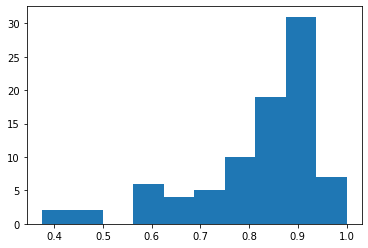

In [43]:
plt.hist(choco_chip_ratings)

The researchers discovered that many chocolate chip cookies taste good.

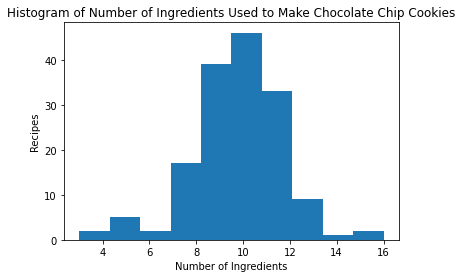

In [48]:
cc_cookie_ing_counts = []

for recipe_index in rcp_indices_w_choco_chip:
    cc_cookie_ing_counts.append(
        len(df_ingredients[df_ingredients["recipe_index"] == recipe_index])
    )

plt.hist(cc_cookie_ing_counts)

plt.title("Histogram of Number of Ingredients Used to Make Chocolate Chip Cookies")
plt.xlabel("Number of Ingredients")
plt.ylabel("Recipes")

plt.show()